# Data Aggregating and EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_clean= pd.read_csv('..\data\clean_crash_data.csv')
display(df_clean)

,report_number,local_case_number,agency_name,acrs_report_type,crash_date/time,hit/run,lane_number,number_of_lanes,road_grade,nontraffic,at_fault,collision_type,weather,light,road_condition,latitude,longitude,location
0,mcp3048005t,190046316,montgomery,property damage crash,2019-09-27 09:38:00,no,0,0,level,yes,driver,single vehicle,clear,daylight,loose surface material,39.026700,-77.136785,"(39.0267, -77.136785)"
1,dm8376000z,210002024,takoma,property damage crash,2021-01-16 21:24:00,no,0,2,level,no,driver,single vehicle,clear,dark lights on,no defects,38.979030,-77.015981,"(38.97903039, -77.01598148)"
2,mcp12050078,210038391,montgomery,property damage crash,2021-09-27 15:00:00,yes,0,0,level,yes,driver,head on left turn,clear,daylight,holes ruts etc,39.023680,-77.145418,"(39.02367954, -77.14541849)"
3,mcp003600g5,220000831,montgomery,property damage crash,2022-01-07 19:00:00,no,0,0,level,yes,unknown,single vehicle,clear,dark lights on,obstruction not signaled,39.058047,-77.125307,"(39.058047, -77.125307)"
4,ej78460055,200017938,gaithersburg,property damage crash,2020-05-02 14:16:00,yes,0,0,level,yes,driver,straight movement angle,clear,daylight,holes ruts etc,39.147956,-77.229616,"(39.14795617, -77.2296164)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83142,ha24980004,22001814,maryland,property damage crash,2022-10-13 14:30:00,yes,0,1,level,no,driver,single vehicle,raining,daylight,no defects,39.212050,-77.281670,"(39.2120499, -77.2816699)"
83143,mcp2708007t,220044172,montgomery,property damage crash,2022-10-09 19:45:00,yes,3,3,level,no,driver,same direction rear end,clear,dark lights on,no defects,39.046391,-76.986974,"(39.04639108, -76.98697395)"
83144,mcp21950059,220045530,montgomery,property damage crash,2022-10-17 12:55:00,yes,0,1,level,no,driver,same direction rear end,cloudy,daylight,no defects,39.104377,-77.157032,"(39.10437667, -77.15703167)"
83145,mcp2592002g,220045353,montgomery,injury crash,2022-10-16 11:00:00,no,1,1,level,no,driver,single vehicle,clear,daylight,loose surface material,39.207037,-77.182050,"(39.20703667, -77.18205)"


# 1) What are top 5 “Road Conditions” with most accidents? 

In [3]:
road_condition_count = df_clean['road_condition'].value_counts().head(5)
display(road_condition_count.to_frame())

,count
road_condition,
no defects,68653
holes ruts etc,5733
loose surface material,3156
foreign material,2319
view obstructed,1460


C:\Users\Omar\AppData\Local\Temp\ipykernel_18332\4013497030.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=road_condition_count.values, y=road_condition_count.index, orient='h',  palette='viridis')


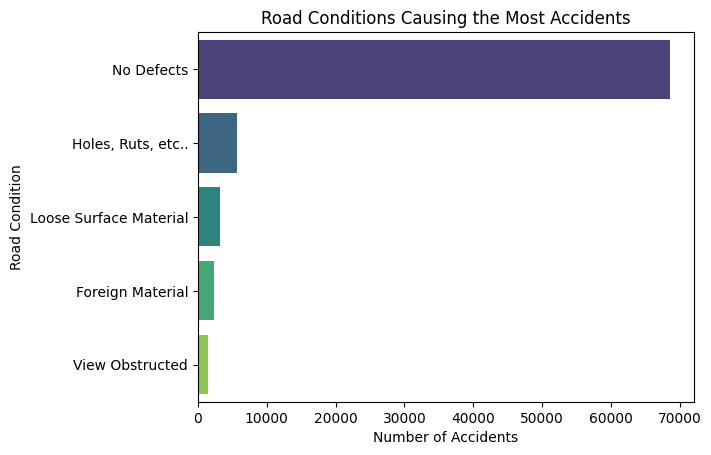

In [4]:
road_condition_count.index = ['No Defects', 'Holes, Ruts, etc..', 'Loose Surface Material', 'Foreign Material', 'View Obstructed']
sns.barplot(x=road_condition_count.values, y=road_condition_count.index, orient='h',  palette='viridis')
plt.title('Road Conditions Causing the Most Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Road Condition')
plt.show()

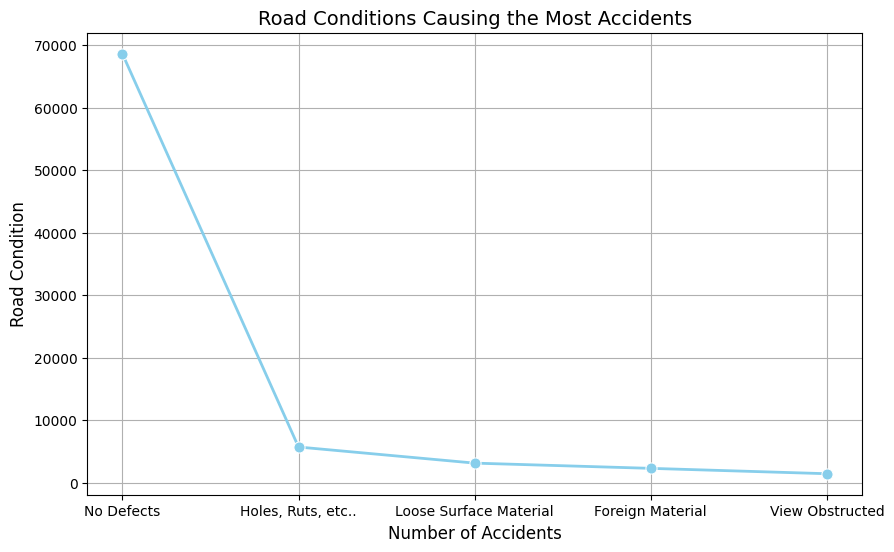

In [5]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=road_condition_count.index, y=road_condition_count.values, marker='o', color='skyblue', linewidth=2, markersize=8)

# Customize the plot
plt.title('Road Conditions Causing the Most Accidents', fontsize='14')
plt.xlabel('Number of Accidents', fontsize='12')
plt.ylabel('Road Condition',fontsize='12')
plt.grid(True)
plt.show()

# 2) What are the top 5 most frequent  “'Collision Type”? 

In [6]:
collision_type_count = df_clean['collision_type'].value_counts().head(5)
display(collision_type_count.to_frame())

,count
collision_type,
same direction rear end,26083
single vehicle,16253
straight movement angle,15126
same direction sideswipe,8707
head on left turn,6337


C:\Users\Omar\AppData\Local\Temp\ipykernel_18332\1512149399.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=collision_type_count.values, y=collision_type_count.index, orient='h',  palette='viridis')


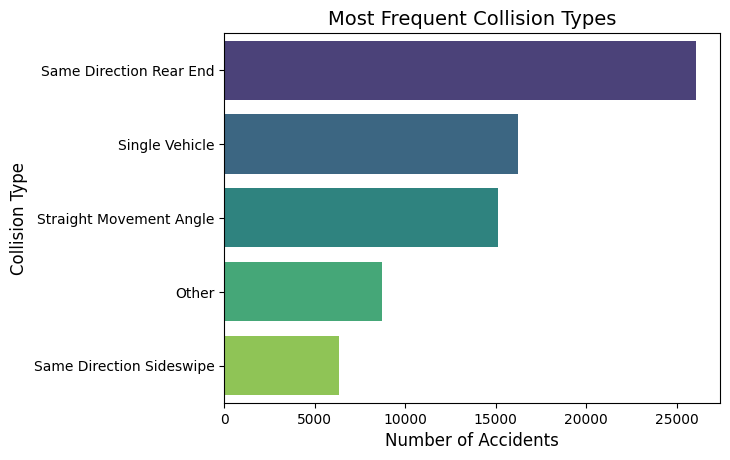

In [7]:
collision_type_count.index = ['Same Direction Rear End', 'Single Vehicle', 'Straight Movement Angle', 'Other', 'Same Direction Sideswipe']
sns.barplot(x=collision_type_count.values, y=collision_type_count.index, orient='h',  palette='viridis')
plt.title('Most Frequent Collision Types', fontsize='14')
plt.xlabel('Number of Accidents', fontsize='12')
plt.ylabel('Collision Type', fontsize='12')
plt.show()

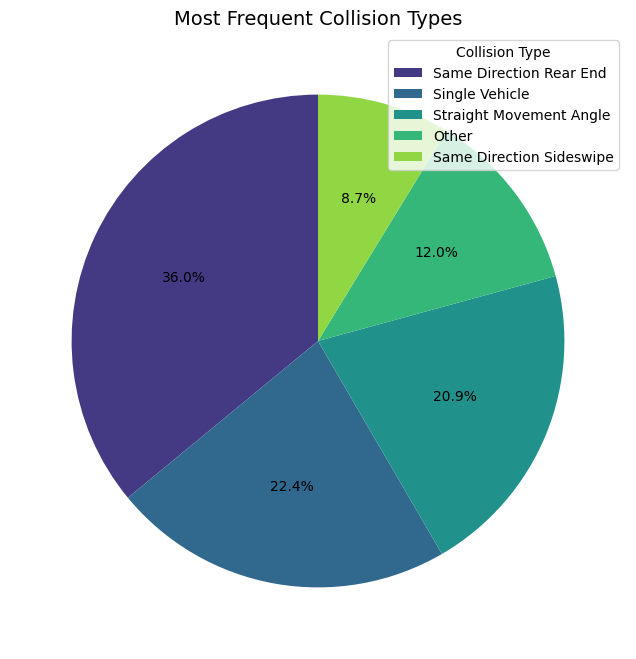

In [8]:
plt.figure(figsize=(8, 8))
colors = sns.color_palette("viridis", n_colors=len(collision_type_count))
plt.pie(collision_type_count, labels=['']*len(collision_type_count), autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Most Frequent Collision Types', fontsize=14)


# Add a legend
plt.legend(title="Collision Type", loc="upper right", labels=collision_type_count.index)
plt.show()

# 3) What are the top 5 most frequent “Weather” conditions?

In [9]:
weather_count = df_clean['weather'].value_counts().head(5)
display(weather_count.to_frame())

,count
weather,
clear,61029
raining,10994
cloudy,9241
snow,937
foggy,376


C:\Users\Omar\AppData\Local\Temp\ipykernel_18332\2313234512.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_count.values, y=collision_type_count.index, orient='h',  palette='viridis')


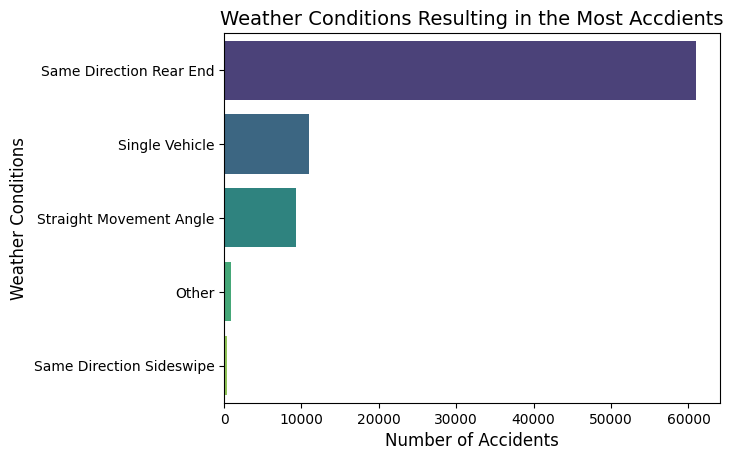

In [10]:
weather_count.index = ['Clear', 'Raining', 'Cloudy', 'Snow' , 'Foggy']
sns.barplot(x=weather_count.values, y=collision_type_count.index, orient='h',  palette='viridis')
plt.title('Weather Conditions Resulting in the Most Accdients', fontsize='14')
plt.xlabel('Number of Accidents', fontsize='12')
plt.ylabel('Weather Conditions', fontsize='12')
plt.show()

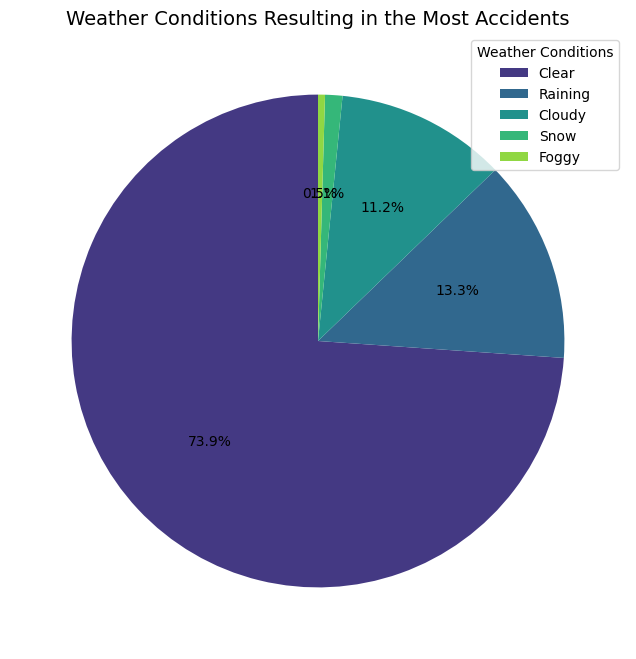

In [11]:
plt.figure(figsize=(8, 8))
colors = sns.color_palette("viridis", n_colors=len(weather_count))
plt.pie(weather_count, labels=['']*len(weather_count), autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Weather Conditions Resulting in the Most Accidents', fontsize=14)

# Add a legend
plt.legend(title="Weather Conditions", loc="upper right", labels=weather_count.index)
plt.show()

# 4) What are the top 5 most frequent “'Light” conditions? 

In [12]:
light_count = df_clean['light'].value_counts().head(5)
display(light_count.to_frame())

,count
light,
daylight,54747
dark lights on,20091
dark no lights,3001
dusk,1904
dawn,1692


C:\Users\Omar\AppData\Local\Temp\ipykernel_18332\3028941206.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_count.values, y=light_count.index, orient='h',  palette='viridis')


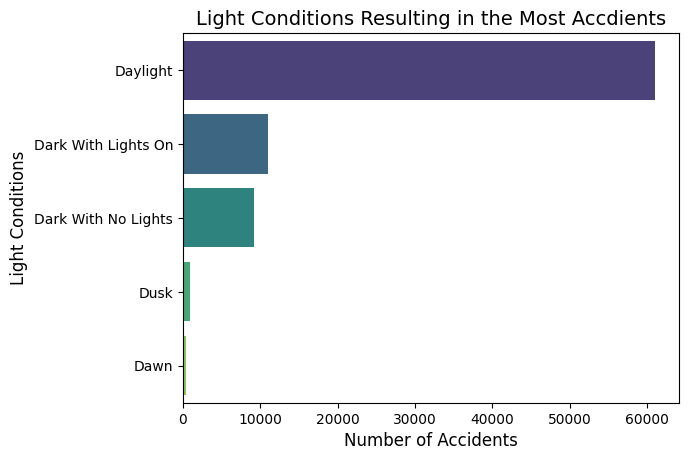

In [13]:
light_count.index = ['Daylight', 'Dark With Lights On', 'Dark With No Lights' , 'Dusk' , 'Dawn']
sns.barplot(x=weather_count.values, y=light_count.index, orient='h',  palette='viridis')
plt.title('Light Conditions Resulting in the Most Accdients', fontsize='14')
plt.xlabel('Number of Accidents', fontsize='12')
plt.ylabel('Light Conditions', fontsize='12')
plt.show()

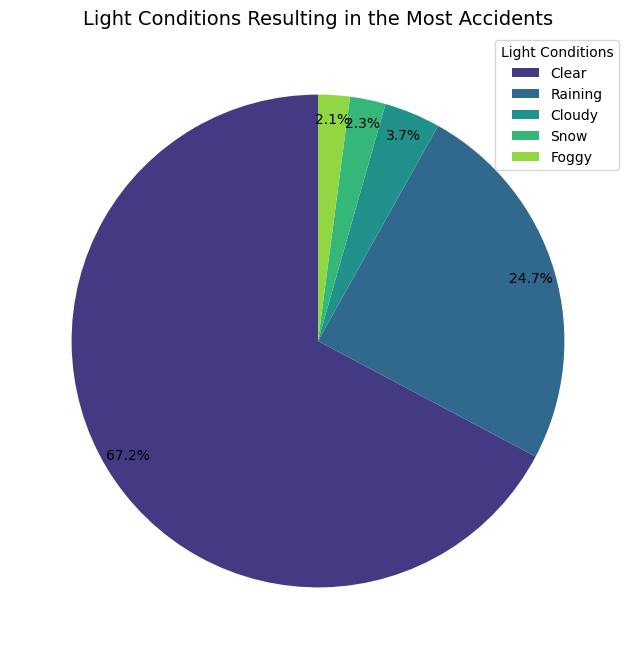

In [14]:
plt.figure(figsize=(8, 8))
colors = sns.color_palette("viridis", n_colors=len(light_count))
plt.pie(light_count, labels=['']*len(light_count), autopct='%1.1f%%', startangle=90, colors=colors, pctdistance=0.9)
plt.title('Light Conditions Resulting in the Most Accidents', fontsize=14)

# Add a legend
plt.legend(title="Light Conditions", loc="upper right", labels=weather_count.index)
plt.show()

# 5) What are the most frequent “Road Condition” and “Road grade”?

In [15]:
rc_and_rg = df_clean.pivot_table(index='road_grade', columns='road_condition', aggfunc='size', fill_value=0)
display(rc_and_rg)
# Find the most frequent combination for each road_type
most_frequent_combination = rc_and_rg.idxmax(axis=1)

road_condition,foreign material,holes ruts etc,loose surface material,no defects,obstruction not lighted,obstruction not signaled,shoulder defect,view obstructed
road_grade,,,,,,,,
dip sag,3,11,2,93,1,1,5,5
grade downhill,297,676,433,8141,44,29,176,211
hill crest,50,150,87,1824,9,9,34,44
hill uphill,223,526,292,6064,24,14,131,126
level,1740,4363,2341,52478,220,140,983,1073
on bridge,6,7,1,53,3,1,2,1


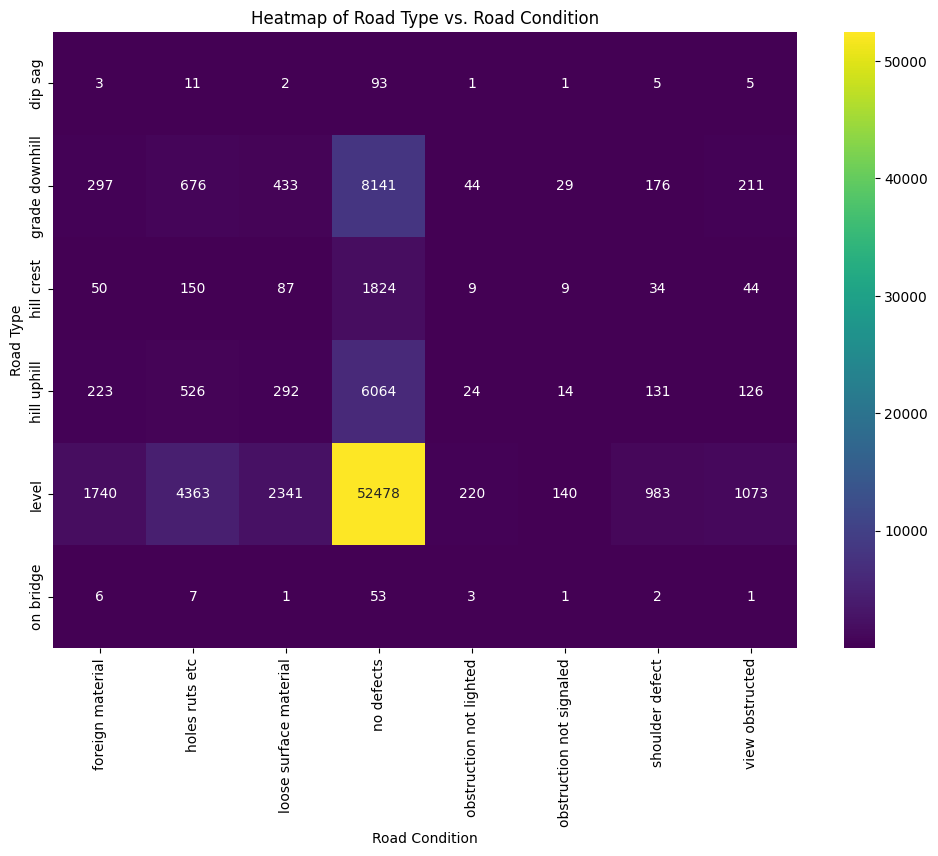

In [16]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(rc_and_rg, annot=True, fmt='d', cmap='viridis')

# Set plot labels and title
plt.xlabel('Road Condition')
plt.ylabel('Road Type')
plt.title('Heatmap of Road Type vs. Road Condition')

# Show the plot
plt.show()

# 8) Get the evolution of the number of crashes per hour

83147

Text(0.5, 1.0, 'Evolution of the Number of Crashes per Hour')

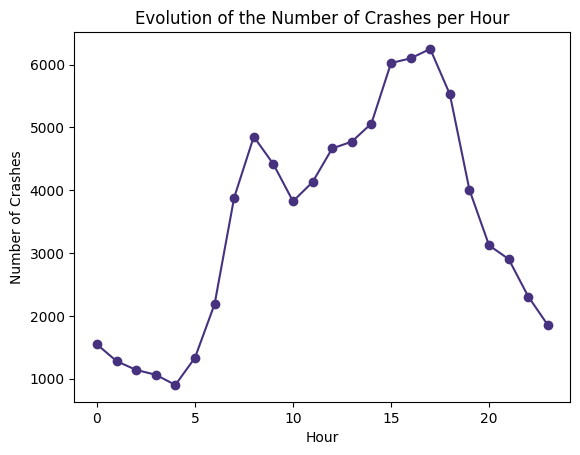

In [70]:
df_clean['crash_date/time']=pd.to_datetime(df_clean['crash_date/time'])
type(df_clean['crash_date/time'])
df_clean['crash_date/time']

df_clean['hour'] = df_clean['crash_date/time'].dt.hour

# Group the data by hour and calculate the count of crashes
crash_count_by_hour = df_clean.groupby('hour').size()
display(sum(crash_count_by_hour))

sns.set_palette('viridis')
# Create a line plot to visualize the trend
plt.plot(crash_count_by_hour.index, crash_count_by_hour.values, marker='o')
plt.xlabel('Hour')
plt.ylabel('Number of Crashes')
plt.title('Evolution of the Number of Crashes per Hour')

# 6) How the number of crashes changes over day time?

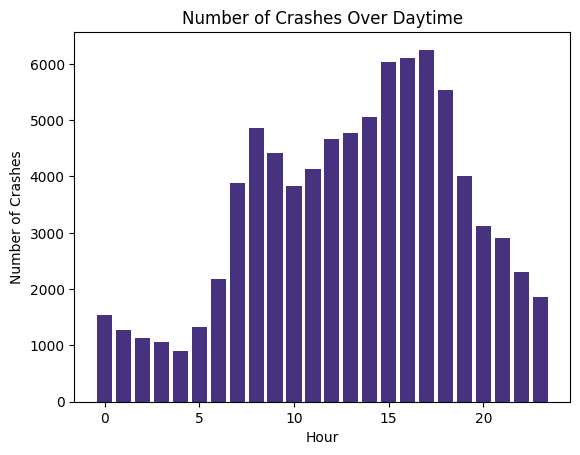

In [43]:
# Group the data by hour and calculate the count of crashes
crash_count_by_hour = df_clean.groupby('hour').size()

sns.set_palette('viridis')

# Create a bar plot
plt.bar(crash_count_by_hour.index, crash_count_by_hour.values)
plt.xlabel('Hour')
plt.ylabel('Number of Crashes')
plt.title('Number of Crashes Over Daytime')
plt.show()


# 7) Which day of the week has more crashes?

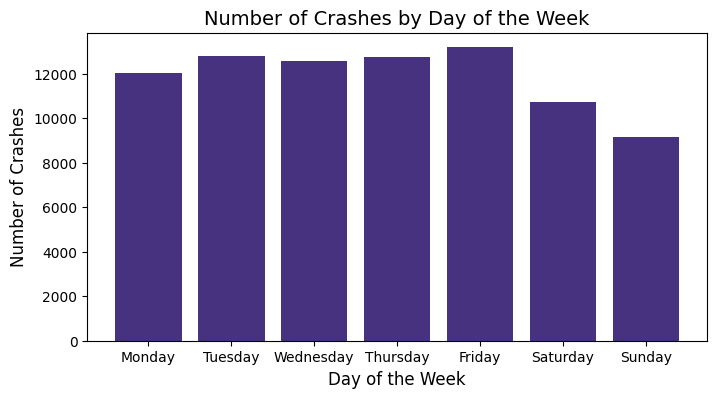

In [64]:
# Extract the day of the week from the 'Timestamp' column
df_clean['DayOfWeek'] = df_clean['crash_date/time'].dt.day_name()

# Count the number of crashes per day of the week
crash_count_by_day = df_clean['DayOfWeek'].value_counts()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crash_count_by_day = crash_count_by_day.reindex(days_order)

plt.figure(figsize=(8, 4)) 
# Create a bar plot to visualize the number of crashes per day of the week
plt.bar(crash_count_by_day.index, crash_count_by_day.values)
plt.xlabel('Day of the Week', fontsize='12')
plt.ylabel('Number of Crashes', fontsize='12')
plt.title('Number of Crashes by Day of the Week', fontsize='14')

plt.show()

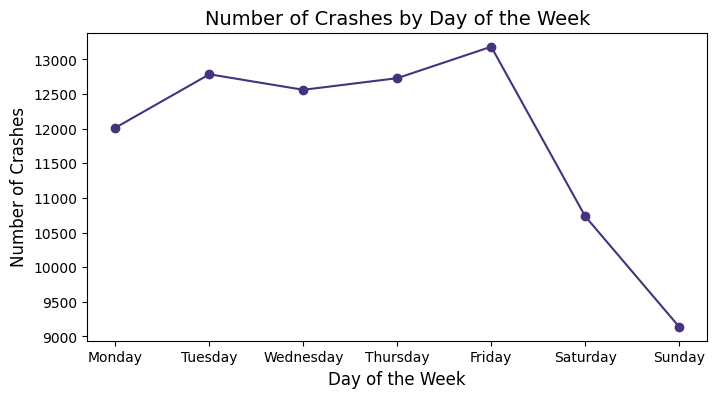

In [65]:
# Create a line plot to visualize the number of crashes per day of the week
plt.figure(figsize=(8, 4))
plt.plot(crash_count_by_day.index, crash_count_by_day.values, marker='o', linestyle='-')
plt.xlabel('Day of the Week', fontsize='12')
plt.ylabel('Number of Crashes', fontsize='12')
plt.title('Number of Crashes by Day of the Week', fontsize='14')

plt.show()

# 9) Get the evolution of the number of crashes per year